In [1]:
import warnings
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.exceptions import ConvergenceWarning
import matplotlib.pyplot as plt


In [2]:
def load_data():
    mnist = fetch_openml('mnist_784', version=1)
    X = mnist.data.to_numpy() / 255.0  # Normalize pixel values to [0,1]
    y = mnist.target.astype(int).to_numpy()
    return train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_test, y_train, y_test = load_data()


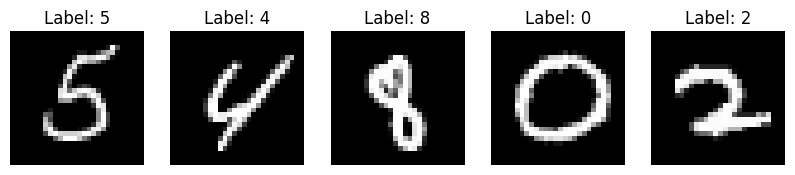

In [3]:
import matplotlib.pyplot as plt

def show_samples(X, y, samples=5):
    plt.figure(figsize=(10, 2))
    for i in range(samples):
        plt.subplot(1, samples, i+1)
        plt.imshow(X[i].reshape(28, 28), cmap='gray')
        plt.title(f"Label: {y[i]}")
        plt.axis('off')
    plt.show()

show_samples(X_train, y_train)


In [4]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import log_loss, accuracy_score
import numpy as np
import matplotlib.pyplot as plt

def train_model_epoch_by_epoch(X_train, y_train, X_test, y_test, epochs=100):
    model = MLPClassifier(
        hidden_layer_sizes=(8),
        activation='relu',
        solver='adam',
        max_iter=1,
        warm_start=True,
        random_state=42,
        verbose=False
    )
    
    train_losses = []
    test_losses = []
    train_accs = []
    test_accs = []
    
    classes = np.unique(y_train)
    
    for epoch in range(epochs):
        # Train one epoch
        model.partial_fit(X_train, y_train, classes=classes)
        
        # Predict probabilities for loss calculation
        train_probs = model.predict_proba(X_train)
        test_probs = model.predict_proba(X_test)
        
        # Calculate log loss
        train_loss = log_loss(y_train, train_probs)
        test_loss = log_loss(y_test, test_probs)
        
        train_losses.append(train_loss)
        test_losses.append(test_loss)
        
        # Predict labels for accuracy
        train_preds = model.predict(X_train)
        test_preds = model.predict(X_test)
        
        train_acc = accuracy_score(y_train, train_preds)
        test_acc = accuracy_score(y_test, test_preds)
        
        train_accs.append(train_acc)
        test_accs.append(test_acc)
        
        print(f"Epoch {epoch+1}/{epochs} - "
              f"Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f} - "
              f"Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}")
    
    return model, train_losses, test_losses, train_accs, test_accs


In [5]:
# Example call
model, train_losses, test_losses, train_accs, test_accs = train_model_epoch_by_epoch(X_train, y_train, X_test, y_test, epochs=50)


Epoch 1/50 - Train Loss: 0.5813, Test Loss: 0.5825 - Train Acc: 0.8387, Test Acc: 0.8367
Epoch 2/50 - Train Loss: 0.4261, Test Loss: 0.4312 - Train Acc: 0.8745, Test Acc: 0.8744
Epoch 3/50 - Train Loss: 0.3744, Test Loss: 0.3819 - Train Acc: 0.8904, Test Acc: 0.8883
Epoch 4/50 - Train Loss: 0.3470, Test Loss: 0.3568 - Train Acc: 0.8986, Test Acc: 0.8973
Epoch 5/50 - Train Loss: 0.3297, Test Loss: 0.3417 - Train Acc: 0.9036, Test Acc: 0.9010
Epoch 6/50 - Train Loss: 0.3177, Test Loss: 0.3318 - Train Acc: 0.9067, Test Acc: 0.9039
Epoch 7/50 - Train Loss: 0.3086, Test Loss: 0.3247 - Train Acc: 0.9099, Test Acc: 0.9070
Epoch 8/50 - Train Loss: 0.3018, Test Loss: 0.3197 - Train Acc: 0.9122, Test Acc: 0.9085
Epoch 9/50 - Train Loss: 0.2960, Test Loss: 0.3157 - Train Acc: 0.9144, Test Acc: 0.9109
Epoch 10/50 - Train Loss: 0.2910, Test Loss: 0.3125 - Train Acc: 0.9157, Test Acc: 0.9116
Epoch 11/50 - Train Loss: 0.2867, Test Loss: 0.3098 - Train Acc: 0.9169, Test Acc: 0.9121
Epoch 12/50 - Train

In [6]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Predict on test set
y_test_preds = model.predict(X_test)

# Final test accuracy
final_test_acc = accuracy_score(y_test, y_test_preds)
print(f"Final Test Accuracy: {final_test_acc:.4f}")


Final Test Accuracy: 0.9191


In [7]:
# Classification report
report = classification_report(y_test, y_test_preds)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95      1343
           1       0.95      0.97      0.96      1600
           2       0.91      0.90      0.90      1380
           3       0.90      0.90      0.90      1433
           4       0.92      0.92      0.92      1295
           5       0.89      0.88      0.88      1273
           6       0.94      0.94      0.94      1396
           7       0.93      0.94      0.94      1503
           8       0.91      0.86      0.88      1357
           9       0.89      0.91      0.90      1420

    accuracy                           0.92     14000
   macro avg       0.92      0.92      0.92     14000
weighted avg       0.92      0.92      0.92     14000



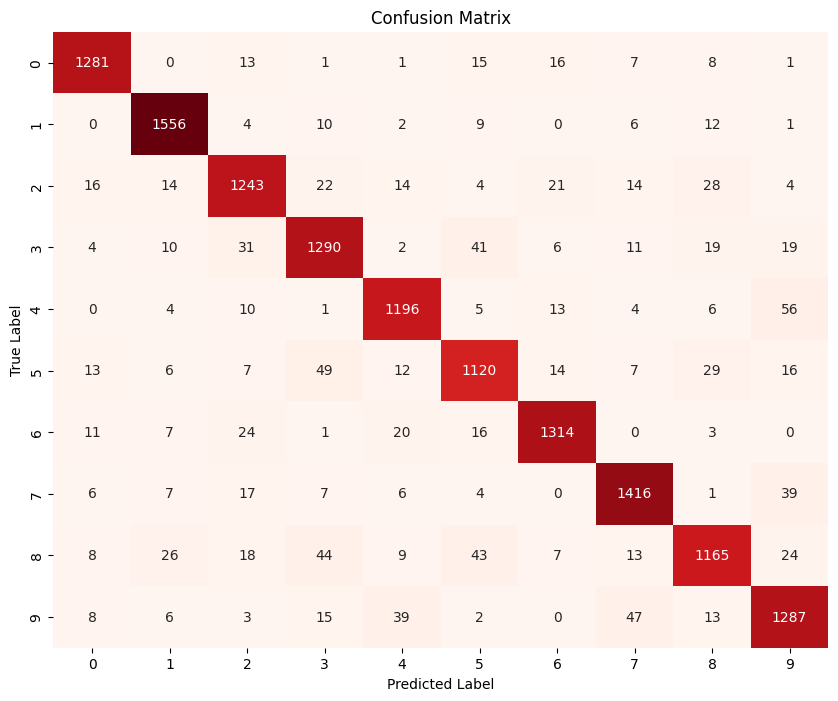

In [17]:
# Confusion matrix
cm = confusion_matrix(y_test, y_test_preds)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()




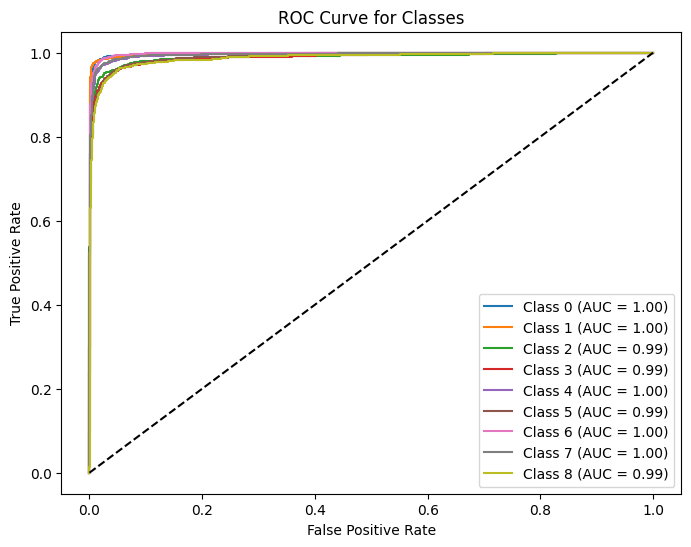

In [9]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np

# Assuming 'model' is your trained MLPClassifier, X_test, y_test are your test data

# For multi-class ROC, binarize labels
y_test_bin = label_binarize(y_test, classes=np.arange(10))
y_score = model.predict_proba(X_test)

# ROC and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC for first 3 classes as example
plt.figure(figsize=(8,6))
for i in range(9):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Classes')
plt.legend(loc='lower right')
plt.show()


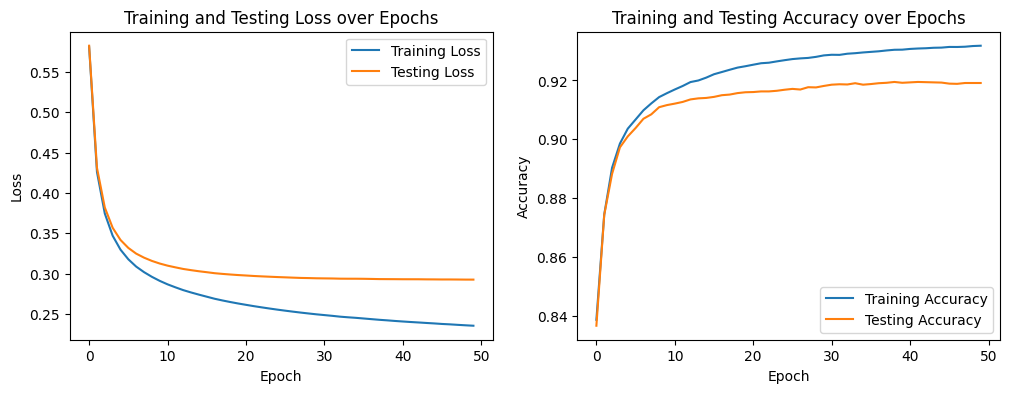

In [10]:
# Plotting both losses and accuracies
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses, label='Testing Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Testing Loss over Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accs, label='Training Accuracy')
plt.plot(test_accs, label='Testing Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy over Epochs')
plt.legend()

plt.show()


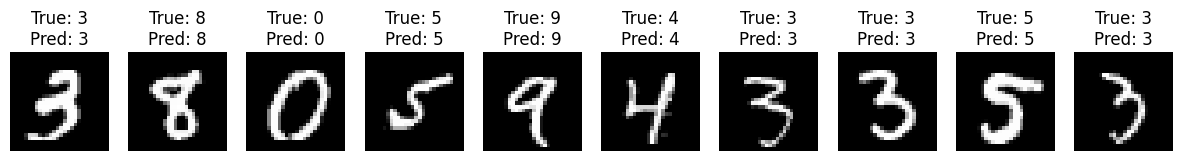

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Predict on the test set
y_pred = model.predict(X_test)

def plot_random_test_images(images, true_labels, pred_labels, num_images=10):
    plt.figure(figsize=(15, 4))
    indices = np.random.choice(len(images), num_images, replace=False)
    for i, idx in enumerate(indices):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[idx].reshape(28, 28), cmap='gray')
        plt.title(f"True: {true_labels[idx]}\nPred: {pred_labels[idx]}")
        plt.axis('off')
    plt.show()

# Show 10 random test images with true and predicted labels
plot_random_test_images(X_test, y_test, y_pred, num_images=10)
